In [1]:
#importing necessary libraries for preprocessing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pylab
from itertools import combinations, groupby
from collections import Counter
import sys
#import missingno as msno


In [2]:
# reading data files

aisles=pd.read_csv("C:/Users/Ami Thakkar/Documents/577_Project/Data/aisles.csv")
departments=pd.read_csv("C:/Users/Ami Thakkar/Documents/577_Project/Data/departments.csv")
Order_prior=pd.read_csv("C:/Users/Ami Thakkar/Documents/577_Project/Data/order_products__prior.csv")
Order_train=pd.read_csv("C:/Users/Ami Thakkar/Documents/577_Project/Data/order_products__train.csv")
Order=pd.read_csv("C:/Users/Ami Thakkar/Documents/577_Project/Data/orders.csv")
products=pd.read_csv("C:/Users/Ami Thakkar/Documents/577_Project/Data/products.csv")

In [3]:
# checking for null values

aisles.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

In [4]:
departments.isnull().sum()

department_id    0
department       0
dtype: int64

In [5]:
Order_prior.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [6]:
Order_train.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [7]:
Order.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [8]:
Order['days_since_prior_order'].fillna(0, inplace=True)

In [9]:
# To display missing values

#msno.matrix(Order)

In [10]:
products.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

## Merging Order Prior and Products

In [11]:
prior_products = pd.merge(left=Order_prior, right=products, how='left')
prior_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,2,28985,2,1,Michigan Organic Kale,83,4
2,2,9327,3,0,Garlic Powder,104,13
3,2,45918,4,1,Coconut Butter,19,13
4,2,30035,5,0,Natural Sweetener,17,13


In [12]:
prior_products=pd.merge(prior_products,aisles,on="aisle_id",how="left")
prior_products=pd.merge(prior_products,departments,on="department_id",how="left")
prior_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


## find department distribution for orders

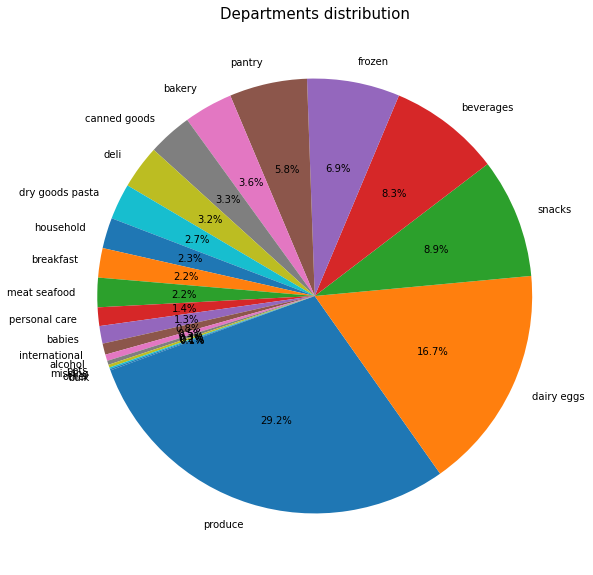

In [13]:
plt.figure(figsize=(10,10))
prior_products_department_count = prior_products['department'].value_counts()
labels = (np.array(prior_products_department_count.index))
sizes = (np.array((prior_products_department_count / prior_products_department_count.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

## Merging Order Train and Order Prior

In [14]:
order_train_prior = pd.concat([Order_train, Order_prior], axis=0)

print("The order_products_all size is : ", order_train_prior.shape)

The order_products_all size is :  (33819106, 4)


In [15]:
order_train_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [16]:
orders_Unique = len(set(order_train_prior.order_id))
products_Unique = len(set(order_train_prior.product_id))

In [17]:
orders_Unique

3346083

In [18]:
products_Unique

49685

## maximum number of products added to cart for prior and train orders

In [19]:
grouped = order_train_prior.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
grouped1 = grouped.add_to_cart_order.value_counts().head(15)

In [20]:
grouped

,order_id,add_to_cart_order
0,1,8
1,2,9
2,3,8
3,4,13
4,5,26
...,...,...
3346078,3421079,1
3346079,3421080,9
3346080,3421081,7
3346081,3421082,7


In [21]:
grouped1

5     237225
6     236383
4     230299
7     228547
3     215060
8     211357
2     194361
9     191564
10    172103
1     163593
11    153495
12    136963
13    121714
14    108077
15     95475
Name: add_to_cart_order, dtype: int64

## no of products added in cart during order

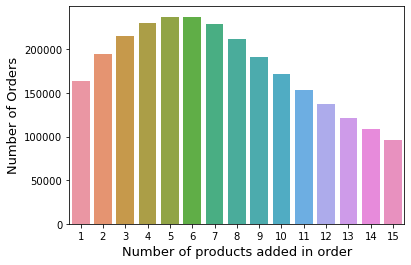

In [22]:
sns.barplot(grouped1.index, grouped1.values)
plt.ylabel('Number of Orders', fontsize=13)
plt.xlabel('Number of products added in order', fontsize=13)
plt.show()

In [23]:
grouped_ = order_train_prior.groupby("product_id")["reordered"].aggregate('count').reset_index()
grouped_ = pd.merge(grouped_, products[['product_id', 'product_name']], how='left', on=['product_id'])


In [24]:
grouped_ = grouped_.sort_values(by='reordered', ascending=False)[:10]

In [25]:
grouped_

,product_id,reordered,product_name
24849,24852,491291,Banana
13173,13176,394930,Bag of Organic Bananas
21134,21137,275577,Organic Strawberries
21900,21903,251705,Organic Baby Spinach
47205,47209,220877,Organic Hass Avocado
47762,47766,184224,Organic Avocado
47622,47626,160792,Large Lemon
16794,16797,149445,Strawberries
26206,26209,146660,Limes
27842,27845,142813,Organic Whole Milk


## merging products and departments

In [26]:
items  = pd.merge(left =pd.merge(left=products, right=departments, how='left'), right=aisles, how='left')
items.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,2,All-Seasons Salt,104,13,pantry,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,frozen meals
4,5,Green Chile Anytime Sauce,5,13,pantry,marinades meat preparation


## combining user to order and product

In [27]:
users_flow = Order[['user_id', 'order_id']].merge(Order_train[['order_id', 'product_id']],
                                          how='inner', left_on='order_id', right_on='order_id')

users_flow = users_flow.merge(items, how='inner', left_on='product_id',
                                         right_on='product_id')

In [28]:
items

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,2,All-Seasons Salt,104,13,pantry,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,frozen meals
4,5,Green Chile Anytime Sauce,5,13,pantry,marinades meat preparation
...,...,...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,alcohol,spirits
49684,49685,En Croute Roast Hazelnut Cranberry,42,1,frozen,frozen vegan vegetarian
49685,49686,Artisan Baguette,112,3,bakery,bread
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,pets,cat food care


## find top selling product of aisle

In [29]:
grouped_u = users_flow.groupby("aisle")["order_id"].aggregate({ 'count'}).reset_index()
grouped_u['Ratio'] = grouped_u["count"].apply(lambda x: x /grouped_u['count'].sum())
grouped_u.sort_values(by='count', ascending=False, inplace=True )
grouped_u.head(10)


,aisle,count,Ratio
53,fresh vegetables,150609,0.108773
50,fresh fruits,150473,0.108675
98,packaged vegetables fruits,78493,0.056689
133,yogurt,55240,0.039896
93,packaged cheese,41699,0.030116
131,water seltzer sparkling water,36617,0.026446
83,milk,32644,0.023576
25,chips pretzels,31269,0.022583
119,soy lactosefree,26240,0.018951
11,bread,23635,0.017070


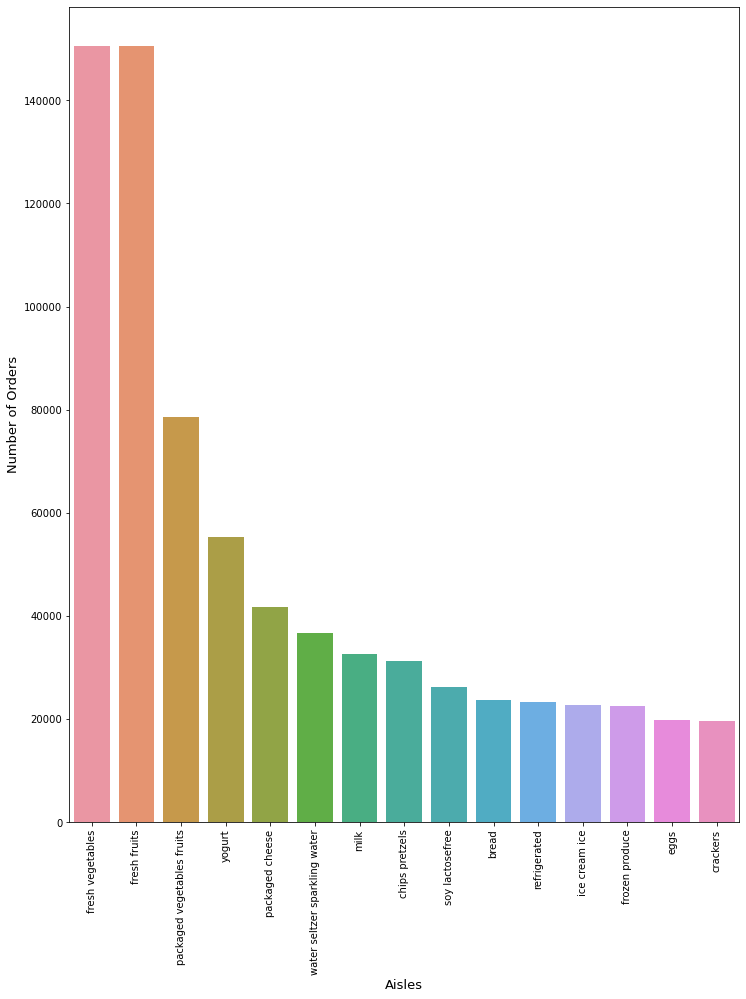

In [30]:
grouped_u  = grouped_u.groupby(["aisle"]).sum()['count'].sort_values(ascending=False)[:15]
f,ax = plt.subplots(figsize=(12, 15))
plt.xticks(rotation='vertical')
sns.barplot(grouped_u.index, grouped_u.values)
plt.ylabel('Number of Orders', fontsize=13)
plt.xlabel('Aisles', fontsize=13)
plt.show()

In [31]:
grouped_u

aisle
fresh vegetables                 150609
fresh fruits                     150473
packaged vegetables fruits        78493
yogurt                            55240
packaged cheese                   41699
water seltzer sparkling water     36617
milk                              32644
chips pretzels                    31269
soy lactosefree                   26240
bread                             23635
refrigerated                      23228
ice cream ice                     22676
frozen produce                    22453
eggs                              19875
crackers                          19592
Name: count, dtype: int64

## check if no of order and reorder are linear for same user_id

In [32]:
reorder_flow = Order[['user_id', 'order_id']].merge(order_train_prior[['order_id', 'product_id','reordered']],
                                          how='inner', left_on='order_id', right_on='order_id')

reorder_flow = reorder_flow.merge(items, how='inner', left_on='product_id',
                                         right_on='product_id')


In [33]:
reorder_flow.head()

,user_id,order_id,product_id,reordered,product_name,aisle_id,department_id,department,aisle
0,1,2539329,196,0,Soda,77,7,beverages,soft drinks
1,1,2398795,196,1,Soda,77,7,beverages,soft drinks
2,1,473747,196,1,Soda,77,7,beverages,soft drinks
3,1,2254736,196,1,Soda,77,7,beverages,soft drinks
4,1,431534,196,1,Soda,77,7,beverages,soft drinks


In [34]:
reorder_count = reorder_flow.groupby(["user_id"])["reordered"].aggregate('sum').reset_index()


In [35]:
reorder_count.head()

,user_id,reordered
0,1,51
1,2,105
2,3,55
3,4,1
4,5,18


In [36]:
order_count = reorder_flow.groupby(["user_id"])["product_id"].aggregate('count').reset_index()


In [37]:
order_count.head()

,user_id,product_id
0,1,70
1,2,226
2,3,88
3,4,18
4,5,46


In [38]:
order_count["product_id"].corr(reorder_count["reordered"]) 

0.9826708506105225

Text(0, 0.5, 'Total no of reorder')

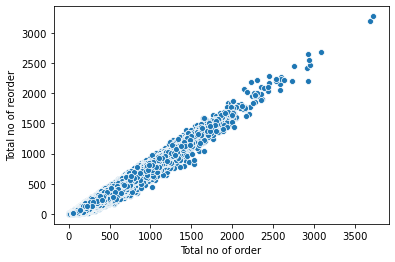

In [39]:
sns.scatterplot(x=order_count["product_id"], y=reorder_count["reordered"])
plt.xlabel("Total no of order")
plt.ylabel("Total no of reorder")

## finding busy hours of the day

[Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Order Count Across Hour Of The Day')]

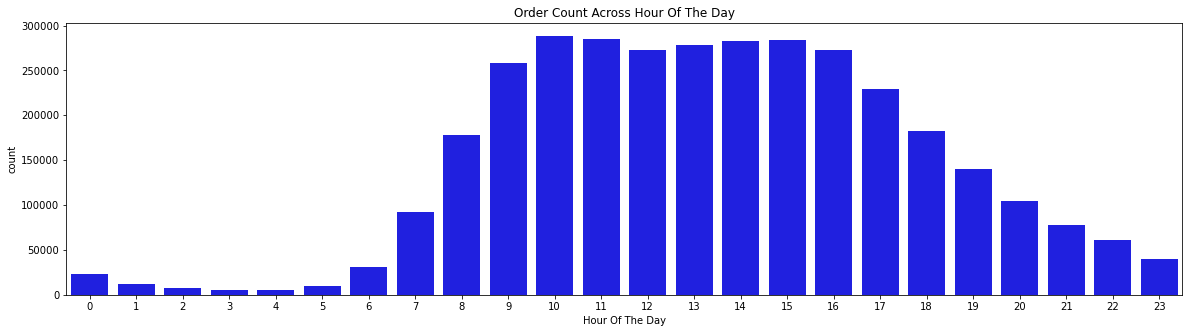

In [40]:
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sns.countplot(data=Order,x="order_hour_of_day",ax=ax,color="b")
ax.set(xlabel='Hour Of The Day',title="Order Count Across Hour Of The Day")

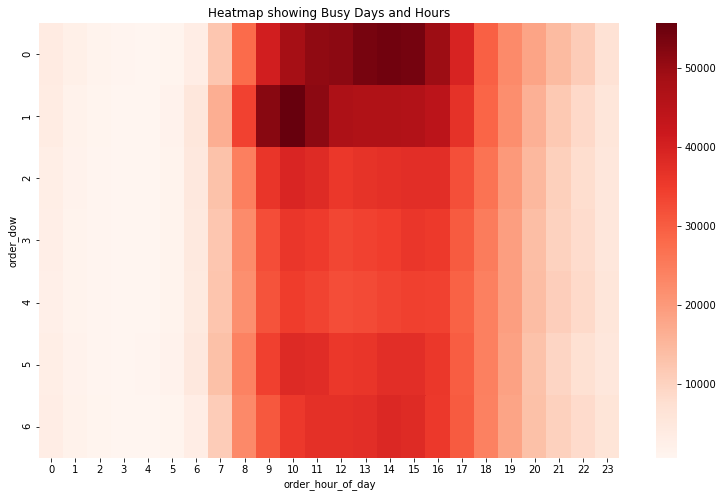

In [41]:
grouped_2 = Order.groupby(["order_dow","order_hour_of_day"])["order_number"].aggregate('count').reset_index()
grouped_2 = grouped_2.pivot('order_dow','order_hour_of_day','order_number')

plt.figure(figsize=(13,8))
sns.heatmap(grouped_2,cmap='Reds')
plt.title("Heatmap showing Busy Days and Hours")
plt.show()

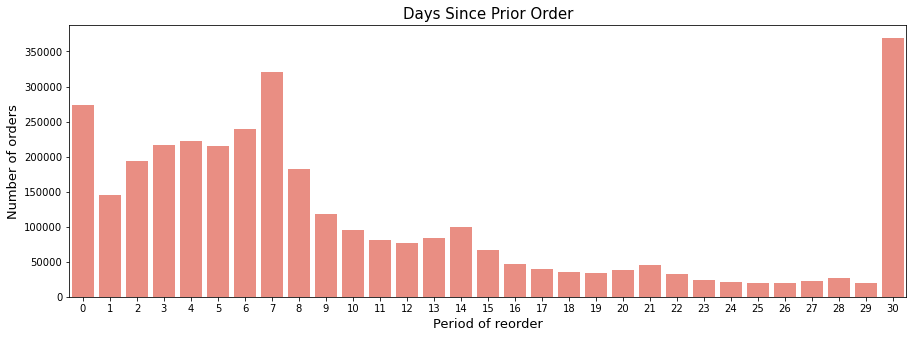

In [42]:
# Days since prior order visualization

days_since_prior_order = Order.groupby("order_id")["days_since_prior_order"].aggregate("sum").reset_index()
days_since_prior_order = days_since_prior_order.days_since_prior_order.value_counts()
days_since_prior_order

from matplotlib.ticker import FormatStrFormatter
f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(days_since_prior_order.index, days_since_prior_order.values, color='salmon')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.title('Days Since Prior Order', fontsize=15)
plt.ylabel('Number of orders', fontsize=13)
plt.xlabel('Period of reorder', fontsize=13)
plt.show()

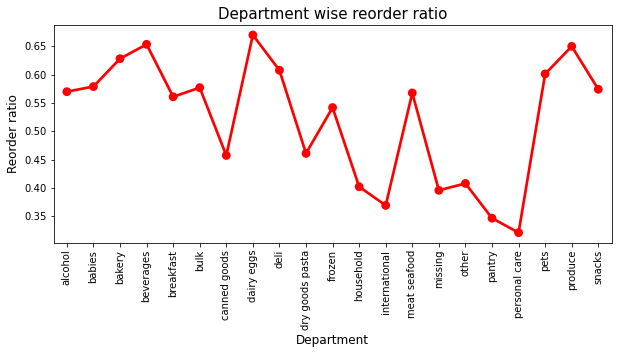

In [43]:
# Department wise reorder ratio visualization

dept_reorder_ratio = prior_products.groupby(["department"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(10,4))
sns.pointplot(dept_reorder_ratio['department'].values, dept_reorder_ratio['reordered'].values, alpha=0.8, color='red')
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [44]:
product_frequency=prior_products.groupby(['product_name'])['product_id'].value_counts(ascending=False).head(50)

In [45]:
product_frequency

product_name                                                                   product_id
#2 Coffee Filters                                                              25773           777
#2 Cone White Coffee Filters                                                   2158             13
#2 Mechanical Pencils                                                          26685             8
#4 Natural Brown Coffee Filters                                                26381           241
& Go! Hazelnut Spread + Pretzel Sticks                                         20604           164
'Swingtop' Premium Lager                                                       27512             1
(70% Juice!) Mountain Raspberry Juice Squeeze                                  40776            28
+Energy Black Cherry Vegetable & Fruit Juice                                   11908            29
.5\" Waterproof Tape                                                           29882             8
0 Calorie Acai Rasp

In [49]:
#top products

In [46]:
top_products=prior_products.loc[prior_products['product_id'].isin(product_frequency)]


In [47]:
top_products_order=Order.loc[Order['order_id'].isin(top_products['order_id'])]


In [48]:
top_products=top_products.merge(Order,how='left',left_on='order_id',right_on='order_id')

In [49]:
top_products.dropna(inplace=True)

## predict stock using logistic regression

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
Y = top_products['product_id']
X = top_products[['order_dow','days_since_prior_order','department_id','aisle_id']]
#we split the dataset into a test and training set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

logreg = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg')
logreg = logreg.fit(X_train, Y_train)
output2 = logreg.predict(X_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


In [51]:
output2 = logreg.predict(top_products[['order_dow','days_since_prior_order','department_id','aisle_id']])


In [52]:
top_products[['order_dow','days_since_prior_order','department_id','aisle_id']]

,order_dow,days_since_prior_order,department_id,aisle_id
0,1,4.0,17,74
1,0,20.0,14,121
2,1,7.0,19,61
3,5,11.0,13,88
4,3,14.0,7,115
...,...,...,...,...
14559,5,7.0,7,94
14560,4,11.0,19,61
14561,5,14.0,19,3
14562,0,5.0,3,128


In [ ]:
#predict stock using top_products

In [58]:
predicted_val=logreg.predict(X)

In [59]:
top_products['Predicted_product']=predicted_val

In [60]:
top_products_predicted=top_products[['order_dow','days_since_prior_order','department_id','aisle_id','product_id','Predicted_product']]

In [61]:
#frequency of products bought by user
top_products_predicted_count = top_products_predicted.groupby(['order_dow','product_id']).agg({'product_id': ['count'],'Predicted_product':'count'}).reset_index()
top_products_predicted_count.columns = ['order_dow','product_id', 'product_count', 'product_predicted_count']

In [62]:
#difference in orignal and predicted values
top_products_predicted_count['difference_count']=top_products_predicted_count['product_predicted_count']-top_products_predicted_count['product_count']

In [63]:
top_products_predicted_count

,order_dow,product_id,product_count,product_predicted_count,difference_count
0,0,1,201,201,0
1,0,2,17,17,0
2,0,8,33,33,0
3,0,10,386,386,0
4,0,13,1,1,0
...,...,...,...,...,...
306,6,2707,289,289,0
307,6,3821,4,4,0
308,6,4080,2,2,0
309,6,8621,1,1,0


In [66]:
#accuracy of stock prediction

In [64]:
output2
logreg.score(X_test, Y_test)


0.9636113971850326

In [67]:

logreg.score(X, Y)

0.9638148860203241

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [69]:
cm = metrics.confusion_matrix(Y, top_products['Predicted_product'])
print(cm)

[[1852    0    0 ...    0    0    0]
 [   0   33    0 ...    0    0    0]
 [   0    0  165 ...    0    0    0]
 ...
 [   0    0    0 ...   33    0    0]
 [   0    0    0 ...    0    8    0]
 [   0    0    0 ...    0    0   27]]


# subscription model

In [71]:
Order_prior

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [72]:
prior_products_user = pd.merge(left=Order_prior, right=Order, how='left')
prior_products_user.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0


In [73]:
#frequency of products bought by user
user_product_frequency = prior_products_user.groupby(['user_id', 'product_id']).agg({'product_id': ['count']}).reset_index()
user_product_frequency.columns = ['user_id', 'product_id', 'product_count']

In [74]:
user_product_frequency

,user_id,product_id,product_count
0,1,196,10
1,1,10258,9
2,1,10326,1
3,1,12427,10
4,1,13032,3
...,...,...,...
13307948,206209,43961,3
13307949,206209,44325,1
13307950,206209,48370,1
13307951,206209,48697,1


In [75]:
user_count_product=user_product_frequency.merge(products)

In [76]:
user_count_product['product_count'].mean()

2.4372259956133

In [77]:
user_count_product[user_count_product['product_count']>2]

,user_id,product_id,product_count,product_name,aisle_id,department_id
0,1,196,10,Soda,77,7
1,15,196,5,Soda,77,7
2,19,196,3,Soda,77,7
6,52,196,14,Soda,77,7
7,67,196,19,Soda,77,7
...,...,...,...,...,...,...
13307887,176797,41407,3,Organic Bean Pasta Sauce,9,9
13307894,177485,30644,3,Organic French Roast,26,7
13307895,182369,30644,3,Organic French Roast,26,7
13307935,192711,32117,3,Red Rageous Chewy Fruit Candy,45,19


In [78]:
lst = user_count_product.groupby('user_id')['product_name'].apply(pd.Series.tolist).tolist()


In [79]:
lst

[['Soda',
  'Pistachios',
  'Organic Fuji Apples',
  'Original Beef Jerky',
  'Cinnamon Toast Crunch',
  'Bag of Organic Bananas',
  'Organic Unsweetened Vanilla Almond Milk',
  'Honeycrisp Apples',
  'Organic String Cheese',
  'Aged White Cheddar Popcorn',
  'XL Pick-A-Size Paper Towel Rolls',
  'Creamy Almond Butter',
  'Organic Unsweetened Almond Milk',
  '0% Greek Strained Yogurt',
  'Milk Chocolate Almonds',
  'Bartlett Pears',
  'Zero Calorie Cola',
  'Organic Half & Half'],
 ['Bag of Organic Bananas',
  'Bartlett Pears',
  'Organic Turkey Burgers',
  'Wild Albacore Tuna No Salt Added',
  'Cherry Pomegranate Greek Yogurt',
  'The \\"World\'s Best\\" Veggie Burger',
  'Garlic Pepper Ramen',
  'Super Tea Power Greens',
  'Organic Lemongrass Ginger Ramen',
  'Total 2% Lowfat Greek Strained Yogurt With Blueberry',
  'Watermelon Chunks',
  'Gluten Free Dark Chocolate Chunk Chewy with a Crunch Granola Bars',
  'Small Hass Avocado',
  'Unsweetened Carob Chips',
  'Apple Cinnamon Fig Bar

In [80]:
groups = user_count_product.groupby('user_id')['product_name'].apply(list) 

In [81]:
groups

user_id
1         [Soda, Pistachios, Organic Fuji Apples, Origin...
2         [Bag of Organic Bananas, Bartlett Pears, Organ...
3         [Strawberries, Organic Avocado, Dried Sweetene...
4         [Organic Large Extra Fancy Fuji Apple, Organic...
5         [Uncured Genoa Salami, Organic Whole Kernel Sw...
                                ...                        
206205    [Organic Half & Half, Uncured Genoa Salami, Or...
206206    [Organic Half & Half, Uncured Genoa Salami, Or...
206207    [Bag of Organic Bananas, Organic String Cheese...
206208    [Bag of Organic Bananas, Organic Large Extra F...
206209    [Bag of Organic Bananas, Banana, Organic Peele...
Name: product_name, Length: 206209, dtype: object

In [82]:
groups_df=pd.DataFrame(groups)

In [83]:
groups_df

,product_name
user_id,
1,"[Soda, Pistachios, Organic Fuji Apples, Origin..."
2,"[Bag of Organic Bananas, Bartlett Pears, Organ..."
3,"[Strawberries, Organic Avocado, Dried Sweetene..."
4,"[Organic Large Extra Fancy Fuji Apple, Organic..."
5,"[Uncured Genoa Salami, Organic Whole Kernel Sw..."
...,...
206205,"[Organic Half & Half, Uncured Genoa Salami, Or..."
206206,"[Organic Half & Half, Uncured Genoa Salami, Or..."
206207,"[Bag of Organic Bananas, Organic String Cheese..."


# Market Basket Analysis

In [85]:
display(Order_prior.head())

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [128]:
# Convert from DataFrame to a Series, with order_id as index and item_id as value
Order_prior = Order_prior.set_index('order_id')['product_id'].rename('item_id')
display(Order_prior.head(10))
type(Order_prior)

order_id
2    33120
2    28985
2     9327
2    45918
2    30035
2    17794
2    40141
2     1819
2    43668
3    33754
Name: item_id, dtype: int64

pandas.core.series.Series

In [73]:
# Returns frequency counts for items and item pairs
def freq(iterable):
    if type(iterable) == pd.core.series.Series:
        return iterable.value_counts().rename("freq")
    else: 
        return pd.Series(Counter(iterable)).rename("freq")

    
# Returns number of unique orders
def order_count(order_item):
    return len(set(order_item.index))


# Returns generator that yields item pairs, one at a time
def get_item_pairs(order_item):
    order_item = order_item.reset_index().values
    for order_id, order_object in groupby(order_item, lambda x: x[0]):
        item_list = [item[1] for item in order_object]
              
        for item_pair in combinations(item_list, 2):
            yield item_pair
            

# Returns frequency and support associated with item
def merge_item_stats(item_pairs, item_stats):
    return (item_pairs
                .merge(item_stats.rename(columns={'freq': 'freqA', 'support': 'supportA'}), left_on='item_A', right_index=True)
                .merge(item_stats.rename(columns={'freq': 'freqB', 'support': 'supportB'}), left_on='item_B', right_index=True))


# Returns name associated with item
def merge_item_name(rules, item_name):
    columns = ['itemA','itemB','freqAB','supportAB','freqA','supportA','freqB','supportB', 
               'confidenceAtoB','confidenceBtoA','lift']
    rules = (rules
                .merge(item_name.rename(columns={'item_name': 'itemA'}), left_on='item_A', right_on='item_id')
                .merge(item_name.rename(columns={'item_name': 'itemB'}), left_on='item_B', right_on='item_id'))
    return rules[columns]               

In [74]:
def association_rules(order_item, min_support):

    print("Starting order_item: {:22d}".format(len(order_item)))


    # Calculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item) * 100


    # Filter from order_item items below min support 
    qualifying_items       = item_stats[item_stats['support'] >= min_support].index
    order_item             = order_item[order_item.isin(qualifying_items)]

    print("Items with support >= {}: {:15d}".format(min_support, len(qualifying_items)))
    print("Remaining order_item: {:21d}".format(len(order_item)))


    # Filter from order_item orders with less than 2 items
    order_size             = freq(order_item.index)
    qualifying_orders      = order_size[order_size >= 2].index
    order_item             = order_item[order_item.index.isin(qualifying_orders)]

    print("Remaining orders with 2+ items: {:11d}".format(len(qualifying_orders)))
    print("Remaining order_item: {:21d}".format(len(order_item)))


    # Recalculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item) * 100


    # Get item pairs generator
    item_pair_gen          = get_item_pairs(order_item)


    # Calculate item pair frequency and support
    item_pairs              = freq(item_pair_gen).to_frame("freqAB")
    item_pairs['supportAB'] = item_pairs['freqAB'] / len(qualifying_orders) * 100

    print("Item pairs: {:31d}".format(len(item_pairs)))


    # Filter from item_pairs those below min support
    item_pairs              = item_pairs[item_pairs['supportAB'] >= min_support]

    print("Item pairs with support >= {}: {:10d}\n".format(min_support, len(item_pairs)))


    # Create table of association rules and compute relevant metrics
    item_pairs = item_pairs.reset_index().rename(columns={'level_0': 'item_A', 'level_1': 'item_B'})
    item_pairs = merge_item_stats(item_pairs, item_stats)
    
    item_pairs['confidenceAtoB'] = item_pairs['supportAB'] / item_pairs['supportA']
    item_pairs['confidenceBtoA'] = item_pairs['supportAB'] / item_pairs['supportB']
    item_pairs['lift']           = item_pairs['supportAB'] / (item_pairs['supportA'] * item_pairs['supportB'])
    

    
    # Return association rules sorted by lift in descending order
    return item_pairs.sort_values('lift', ascending=False)
   # return pd.Series(Counter(iterable)).rename("freq")

In [75]:
%%time
rules = association_rules(Order_prior, 0.01) 

Starting order_item:               32434489
Items with support >= 0.01:           10906
Remaining order_item:              29843570
Remaining orders with 2+ items:     3013325
Remaining order_item:              29662716
Item pairs:                        30622410
Item pairs with support >= 0.01:      48751

CPU times: user 5min 10s, sys: 44.4 s, total: 5min 54s
Wall time: 6min 3s


In [77]:
#Replace item ID with item name and display association rules
item_name   = products.rename(columns={'product_id':'item_id', 'product_name':'item_name'})
rules_final = merge_item_name(rules, item_name).sort_values('lift', ascending=False)
display(rules_final)

,itemA,itemB,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
0,Organic Strawberry Chia Lowfat 2% Cottage Cheese,Organic Cottage Cheese Blueberry Acai Chia,306,0.010155,1163,0.038595,839,0.027843,0.263113,0.364720,9.449868
1,Grain Free Chicken Formula Cat Food,Grain Free Turkey Formula Cat Food,318,0.010553,1809,0.060033,879,0.029170,0.175788,0.361775,6.026229
3,Organic Fruit Yogurt Smoothie Mixed Berry,Apple Blueberry Fruit Yogurt Smoothie,349,0.011582,1518,0.050376,1249,0.041449,0.229908,0.279424,5.546732
9,Nonfat Strawberry With Fruit On The Bottom Gre...,"0% Greek, Blueberry on the Bottom Yogurt",409,0.013573,1666,0.055288,1391,0.046162,0.245498,0.294033,5.318230
10,Organic Grapefruit Ginger Sparkling Yerba Mate,Cranberry Pomegranate Sparkling Yerba Mate,351,0.011648,1731,0.057445,1149,0.038131,0.202773,0.305483,5.317849
...,...,...,...,...,...,...,...,...,...,...,...
7271,Organic Strawberries,Strawberries,640,0.021239,263416,8.741706,141805,4.705931,0.002430,0.004513,0.000516
6763,Organic Hass Avocado,Organic Avocado,464,0.015398,212785,7.061469,176241,5.848722,0.002181,0.002633,0.000373
4387,Organic Avocado,Organic Hass Avocado,443,0.014701,176241,5.848722,212785,7.061469,0.002514,0.002082,0.000356
2596,Banana,Bag of Organic Bananas,654,0.021704,470096,15.600574,376367,12.490090,0.001391,0.001738,0.000111


# K -means clusterung

In [86]:
cluster = pd.DataFrame(Order_prior.groupby('order_id')['order_id'].value_counts())
cluster1 = cluster.rename(columns = {'order_id':'order_size'})
cluster1.reset_index(level=1, drop = True, inplace = True)
cluster_join = pd.merge(cluster1, Order, on = 'order_id', how = 'left')

In [87]:
from sklearn import preprocessing

#feature engineering - generating 6 new columns

cluster_join_1 = cluster_join.groupby('user_id').agg(total_orders = ('user_id', "count"), avg_order_size =('order_size', "mean"), avg_lag = ('days_since_prior_order', "mean"))
cluster_join_1.reset_index(level=0, inplace = True)

cluster_join_2 = cluster_join_1
cluster_join_2['avg_lag_scaled'] = preprocessing.scale(cluster_join_1['avg_lag'])
cluster_join_2['avg_order_size_scaled'] = preprocessing.scale(cluster_join_1['avg_order_size'])
cluster_join_2['total_orders_scaled'] = preprocessing.scale(cluster_join_1['total_orders'])
cluster_join_2.head()

,user_id,total_orders,avg_order_size,avg_lag,avg_lag_scaled,avg_order_size_scaled,total_orders_scaled
0,1,10,5.900000,17.600000,0.891953,-0.690978,-0.335662
1,2,14,13.928571,14.142857,0.248899,0.678255,-0.095490
2,3,12,7.333333,11.083333,-0.320196,-0.446530,-0.215576
3,4,5,3.600000,11.000000,-0.335697,-1.083231,-0.635877
4,5,4,9.250000,10.000000,-0.521704,-0.119652,-0.695920


In [88]:
cluster_join_1.head()

,user_id,total_orders,avg_order_size,avg_lag,avg_lag_scaled,avg_order_size_scaled,total_orders_scaled
0,1,10,5.900000,17.600000,0.891953,-0.690978,-0.335662
1,2,14,13.928571,14.142857,0.248899,0.678255,-0.095490
2,3,12,7.333333,11.083333,-0.320196,-0.446530,-0.215576
3,4,5,3.600000,11.000000,-0.335697,-1.083231,-0.635877
4,5,4,9.250000,10.000000,-0.521704,-0.119652,-0.695920


<ipython-input-89-3bbee610099e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_score['clusters'] = kmeans.labels_
<ipython-input-89-3bbee610099e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_score['clusters'] = kmeans.labels_
<ipython-input-89-3bbee610099e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

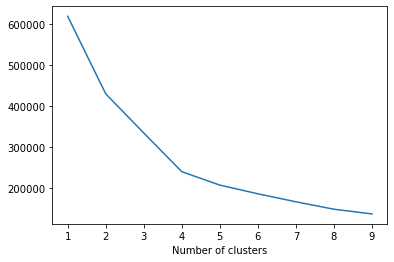

In [89]:
from sklearn.cluster import KMeans

sse = {}

total_score = cluster_join_2[['total_orders_scaled', 'avg_lag_scaled', 'avg_order_size_scaled']]

for k in range(1, 10):
    kmeans = KMeans(n_clusters= k, max_iter = 1000).fit(total_score)
    total_score['clusters'] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.show()

In [90]:
#As the bend takes place at 4, the number of clusters to be considered is 4 (n)

kmeans = KMeans(n_clusters = 4)
kmeans.fit(cluster_join_2[['total_orders_scaled', 'avg_lag_scaled', 'avg_order_size_scaled']])
cluster_join_2['Total_cluster'] = kmeans.predict(cluster_join_2[['total_orders_scaled', 'avg_lag_scaled', 'avg_order_size_scaled']])
cluster_join_2.groupby('Total_cluster')[['total_orders', 'avg_lag', 'avg_order_size']].mean()

,total_orders,avg_lag,avg_order_size
Total_cluster,,,
0,55.026853,6.256747,10.011943
1,7.760357,18.153928,7.352897
2,13.434586,9.296939,7.782956
3,11.653712,13.759057,18.960077


In [91]:
#Also n-1 and n+1 are to be considered. For now, let's consider n-1 

kmeans = KMeans(n_clusters = 3)
kmeans.fit(cluster_join_2[['total_orders_scaled', 'avg_lag_scaled', 'avg_order_size_scaled']])
cluster_join_2['Total_cluster'] = kmeans.predict(cluster_join_2[['total_orders_scaled', 'avg_lag_scaled', 'avg_order_size_scaled']])
cluster_join_2.groupby('Total_cluster')[['total_orders', 'avg_lag', 'avg_order_size']].mean()

,total_orders,avg_lag,avg_order_size
Total_cluster,,,
0,10.975398,13.479950,17.466583
1,47.256159,6.793610,9.574324
2,9.455218,14.054295,6.871153


Text(0, 0.5, 'Value')

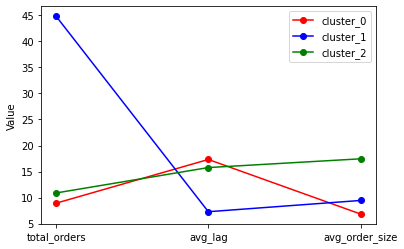

In [130]:
x_axis = ['total_orders', 'avg_lag', 'avg_order_size']
cluster_0 = [8.94, 17.32, 6.86]
cluster_1 = [44.78, 7.30, 9.46]
cluster_2 = [10.90, 15.77, 17.45]
line1 = plt.plot(x_axis, cluster_0, 'ro-', label = 'cluster_0')
line2 = plt.plot(x_axis, cluster_1, 'bo-', label = 'cluster_1')
line3 = plt.plot(x_axis, cluster_2, 'go-', label = 'cluster_2')
plt.legend(loc="upper right")
plt.ylabel('Value')

In [102]:
kmeans_join_1 = cluster_join.groupby('user_id').agg(total_orders = ('user_id', "count"), avg_order_size =('order_size', "mean"), avg_lag = ('days_since_prior_order', "mean"))

In [104]:
kmeans.predict(kmeans_join_1)

array([0, 0, 1, ..., 0, 1, 0])

# RFM analysis

In [95]:
# the new columns created in kmeans clustering is used for RFM analysis, but only 3 columns out of 6
RFM_join_1 = cluster_join.groupby('user_id').agg(total_orders = ('user_id', "count"), avg_order_size =('order_size', "mean"), avg_lag = ('days_since_prior_order', "mean"))

In [96]:
RFM_join_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206209 entries, 1 to 206209
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   total_orders    206209 non-null  int64  
 1   avg_order_size  206209 non-null  float64
 2   avg_lag         206209 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 6.3 MB


In [97]:
#renaming the column names

RFM_join_1.columns = ['frequency','monetary','recency']

In [98]:
#assigning values to the quartiles

RFM_join_1['r_quartile'] = pd.qcut(RFM_join_1['recency'], 4, ['1','2','3','4'])
RFM_join_1['f_quartile'] = pd.qcut(RFM_join_1['frequency'], 4, ['4','3','2','1'])
RFM_join_1['m_quartile'] = pd.qcut(RFM_join_1['monetary'], 4, ['4','3','2','1'])

In [99]:
RFM_join_1['RFM_Score'] = RFM_join_1.r_quartile.astype(str)+ RFM_join_1.f_quartile.astype(str) + RFM_join_1.m_quartile.astype(str)
RFM_join_1.head()

,frequency,monetary,recency,r_quartile,f_quartile,m_quartile,RFM_Score
user_id,,,,,,,
1,10,5.900000,17.600000,4,2,3,423
2,14,13.928571,14.142857,3,2,1,321
3,12,7.333333,11.083333,2,2,3,223
4,5,3.600000,11.000000,2,4,4,244
5,4,9.250000,10.000000,2,4,2,242


In [100]:
RFM_join_1[RFM_join_1['RFM_Score']=='111'].sort_values('monetary', ascending=False).head()

,frequency,monetary,recency,r_quartile,f_quartile,m_quartile,RFM_Score
user_id,,,,,,,
129928,64,56.843750,5.578125,1,1,1,111
52008,47,50.765957,7.638298,1,1,1,111
2335,44,50.272727,7.772727,1,1,1,111
57546,49,49.897959,7.306122,1,1,1,111
181991,50,49.260000,7.160000,1,1,1,111


# Priority customers (total no of orders)

In [106]:
Order

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,0.0
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [107]:
Total_Number_Of_Orders = Order.groupby('user_id')['order_number'].count()
Total_Number_Of_Orders

user_id
1         11
2         15
3         13
4          6
5          5
          ..
206205     4
206206    68
206207    17
206208    50
206209    14
Name: order_number, Length: 206209, dtype: int64

In [108]:
Total_Number_Of_Orders.mean()

16.590367054784224

In [109]:
Priority_Customers_Basis_Total_Orders_Filter = Total_Number_Of_Orders[Total_Number_Of_Orders >= 17]
Priority_Customers_Basis_Total_Orders_Filter

user_id
7         21
15        23
17        41
21        34
24        19
          ..
206201    33
206202    23
206206    68
206207    17
206208    50
Name: order_number, Length: 65296, dtype: int64

In [110]:
Priority_Customers_Basis_Total_Orders_Select = pd.DataFrame(Priority_Customers_Basis_Total_Orders_Filter.reset_index())
Priority_Customers_Basis_Total_Orders = Order[Order.user_id.isin(Priority_Customers_Basis_Total_Orders_Select['user_id'])]
Priority_Customers_Basis_Total_Orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
54,2565571,7,prior,1,3,9,0.0
55,2402008,7,prior,2,1,19,30.0
56,121053,7,prior,3,0,18,30.0
57,1695742,7,prior,4,2,10,9.0
58,3321109,7,prior,5,5,18,3.0
...,...,...,...,...,...,...,...
3421064,3059777,206208,prior,46,1,10,13.0
3421065,2239861,206208,prior,47,3,4,9.0
3421066,1285346,206208,prior,48,1,11,5.0
3421067,1882108,206208,prior,49,1,22,7.0


In [111]:
User_ID_Cnt = Priority_Customers_Basis_Total_Orders.user_id.unique()
User_ID_Cnt

array([     7,     15,     17, ..., 206206, 206207, 206208], dtype=int64)

In [112]:
#Users with high orders

In [113]:
Unique_User_Cnt = Priority_Customers_Basis_Total_Orders.user_id.nunique()
Unique_User_Cnt

65296

In [114]:
Priority_Customers_Basis_Returning = Priority_Customers_Basis_Total_Orders.groupby('user_id')['days_since_prior_order'].mean()
Priority_Customers_Basis_Returning

user_id
7          9.952381
15        10.173913
17         7.804878
21        10.147059
24        13.894737
            ...    
206201    10.393939
206202    11.956522
206206     3.661765
206207    13.470588
206208     7.220000
Name: days_since_prior_order, Length: 65296, dtype: float64

In [115]:
Priority_Customers_Basis_Returning.mean()

9.568297379166662

In [116]:
Priority_Customers_Basis_Returning_Filter = Priority_Customers_Basis_Returning[Priority_Customers_Basis_Returning <= 10]
Priority_Customers_Basis_Returning_Filter

user_id
7         9.952381
17        7.804878
27        4.378049
31        5.285714
36        9.289474
            ...   
206193    5.642857
206195    7.600000
206200    8.458333
206206    3.661765
206208    7.220000
Name: days_since_prior_order, Length: 36939, dtype: float64

In [117]:
Priority_Customers_Basis_Returning_Filter_Value = pd.DataFrame(Priority_Customers_Basis_Returning_Filter).reset_index()
Priority_Customers_Basis_Returning_Filter_Value

,user_id,days_since_prior_order
0,7,9.952381
1,17,7.804878
2,27,4.378049
3,31,5.285714
4,36,9.289474
...,...,...
36934,206193,5.642857
36935,206195,7.600000
36936,206200,8.458333
36937,206206,3.661765


In [118]:
Priority_Customers_Basis_Returning_Value = Priority_Customers_Basis_Total_Orders[Priority_Customers_Basis_Total_Orders.user_id.isin(Priority_Customers_Basis_Returning_Filter_Value['user_id'])]
Priority_Customers_Basis_Returning_Value

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
54,2565571,7,prior,1,3,9,0.0
55,2402008,7,prior,2,1,19,30.0
56,121053,7,prior,3,0,18,30.0
57,1695742,7,prior,4,2,10,9.0
58,3321109,7,prior,5,5,18,3.0
...,...,...,...,...,...,...,...
3421064,3059777,206208,prior,46,1,10,13.0
3421065,2239861,206208,prior,47,3,4,9.0
3421066,1285346,206208,prior,48,1,11,5.0
3421067,1882108,206208,prior,49,1,22,7.0


In [119]:
User_ID_Values = Priority_Customers_Basis_Returning_Value.user_id.unique()
User_ID_Values

array([     7,     17,     27, ..., 206200, 206206, 206208], dtype=int64)

In [120]:
#Users with high order and reorder (Returning Customers)

In [121]:
User_ID_Count = Priority_Customers_Basis_Returning_Value.user_id.nunique()
User_ID_Count

36939

In [122]:
Priority_Customers_Basis_Total_Orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
54,2565571,7,prior,1,3,9,0.0
55,2402008,7,prior,2,1,19,30.0
56,121053,7,prior,3,0,18,30.0
57,1695742,7,prior,4,2,10,9.0
58,3321109,7,prior,5,5,18,3.0
...,...,...,...,...,...,...,...
3421064,3059777,206208,prior,46,1,10,13.0
3421065,2239861,206208,prior,47,3,4,9.0
3421066,1285346,206208,prior,48,1,11,5.0
3421067,1882108,206208,prior,49,1,22,7.0


In [123]:
Priority_Customers_Basis_Returning_Value

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
54,2565571,7,prior,1,3,9,0.0
55,2402008,7,prior,2,1,19,30.0
56,121053,7,prior,3,0,18,30.0
57,1695742,7,prior,4,2,10,9.0
58,3321109,7,prior,5,5,18,3.0
...,...,...,...,...,...,...,...
3421064,3059777,206208,prior,46,1,10,13.0
3421065,2239861,206208,prior,47,3,4,9.0
3421066,1285346,206208,prior,48,1,11,5.0
3421067,1882108,206208,prior,49,1,22,7.0


In [124]:
#High Correlation between Users with high orders and reorders

In [125]:
Priority_Customers_Basis_Total_Orders["user_id"].corr(Priority_Customers_Basis_Returning_Value["user_id"])

1.0

In [126]:
User_ID_Values_Priority = Priority_Customers_Basis_Returning_Value.user_id.unique()
User_ID_Values_Priority

array([     7,     17,     27, ..., 206200, 206206, 206208], dtype=int64)

In [127]:
User_ID_Count_Priority = Priority_Customers_Basis_Returning_Value.user_id.nunique()
User_ID_Count_Priority

36939